In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import linear_model #FOR LINEAR REGRESSION
from sklearn.linear_model import LogisticRegression #FOR LOGISTIC REGRESSION
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
#Load data
train = pd.read_csv('/content/Training.csv')
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
del train[train.columns[-1]]
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
train.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
4915    False
4916    False
4917    False
4918    False
4919    False
Length: 4920, dtype: bool

In [ ]:
train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.isnull().sum()               #Checking if any value is missing by variable


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
X=train.iloc[:,:-1]                #printing all the rows and columns except column prognosis
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [ ]:
features = X.columns

In [ ]:
Y = train.iloc[:,-1]                #printing all the rows of target variable "prognosis"
Y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)

[15 15 15 ... 38 35 27]


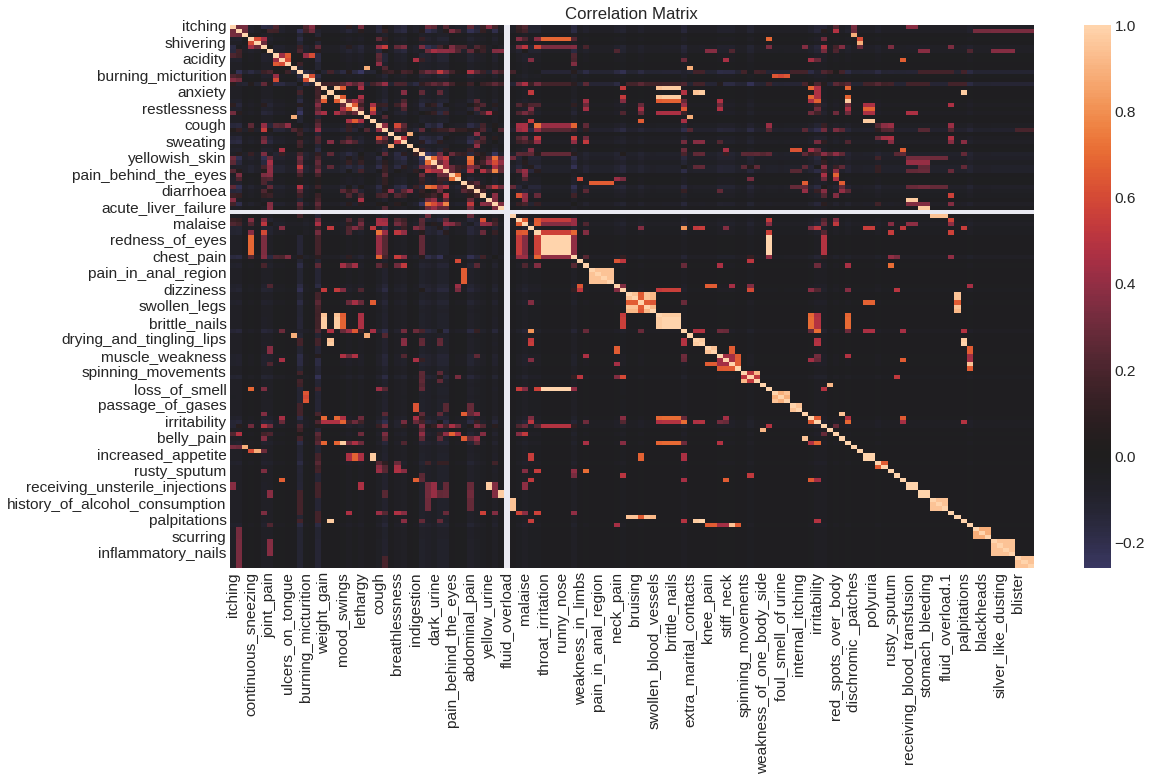

In [ ]:
plt.figure(figsize = (18, 10))
cormat = sns.heatmap(X.corr(method='spearman'), center=0.0, linecolor='k')
cormat.set_title('Correlation Matrix')
plt.show()

Best alpha using built-in LassoCV: 0.001078
Best score using built-in LassoCV: 0.978033
Lasso picked 121 variables and eliminated the other 11 variables


Text(0.5, 1.0, 'Feature importance using Lasso')

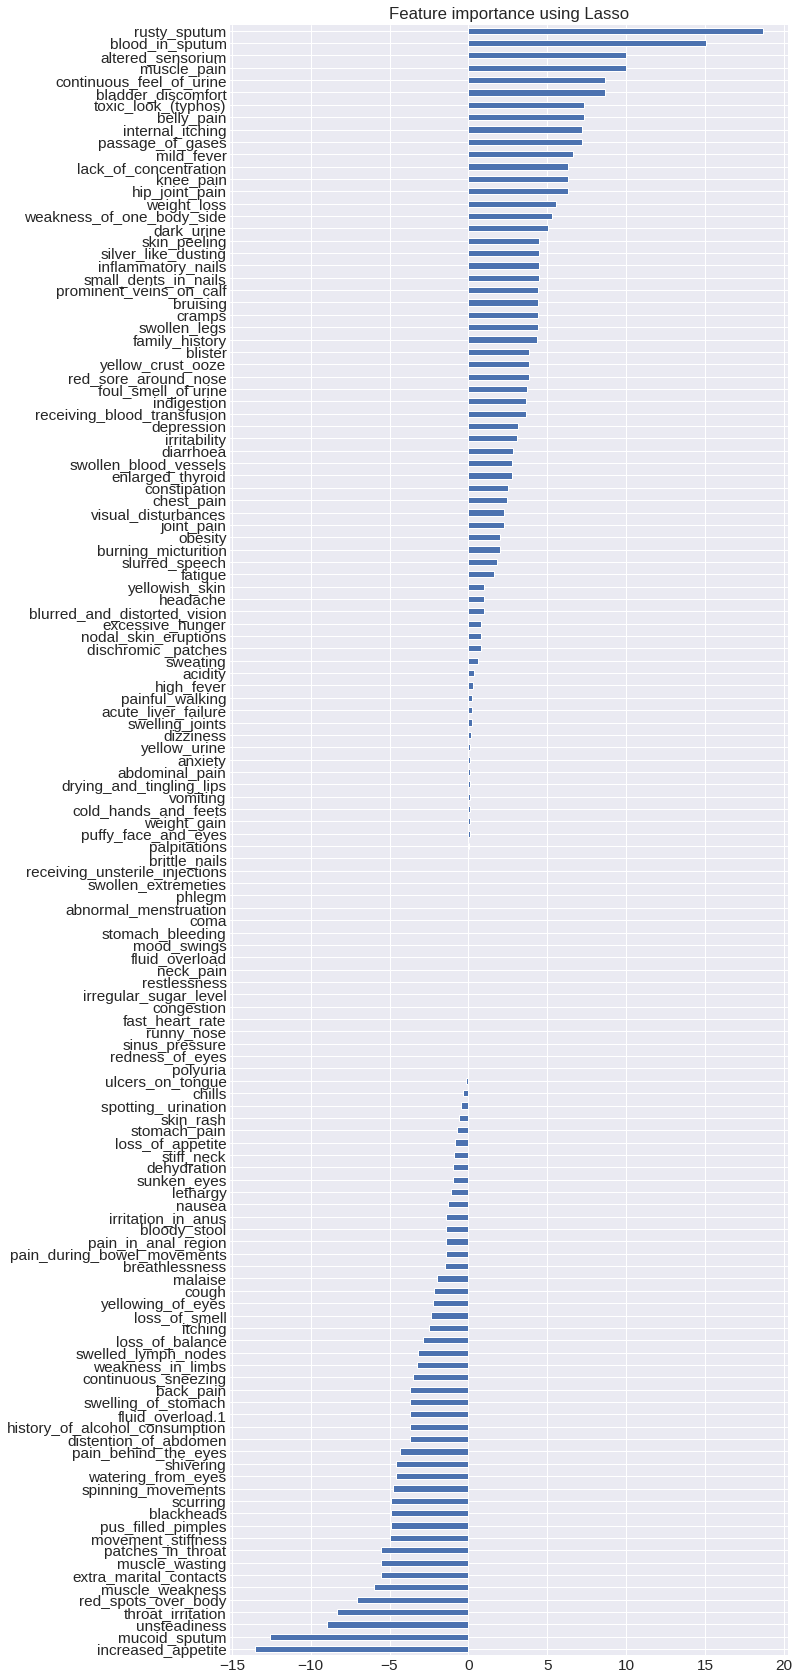

In [ ]:
regularization = LassoCV()
regularization.fit(X, Y)
print("Best alpha using built-in LassoCV: %f" % regularization.alpha_)
print("Best score using built-in LassoCV: %f" %regularization.score(X,Y))
coef = pd.Series(regularization.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 30)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso")

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=10):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

# calculate_vif_(X)

In [ ]:
X = calculate_vif_(X)

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'throat_irritation' at index: 51
dropping 'redness_of_eyes' at index: 51
dropping 'sinus_pressure' at index: 51
dropping 'runny_nose' at index: 51
dropping 'congestion' at index: 51
dropping 'enlarged_thyroid' at index: 66
dropping 'brittle_nails' at index: 66
dropping 'slurred_speech' at index: 70
dropping 'increased_appetite' at index: 96
dropping 'receiving_blood_transfusion' at index: 102
dropping 'coma' at index: 103
dropping 'abnormal_menstruation' at index: 93
dropping 'swollen_extremeties' at index: 66
dropping 'palpitations' at index: 107
dropping 'phlegm' at index: 50
dropping 'polyuria' at index: 93
dropping 'irritability' at index: 86
dropping 'malaise' at index: 48
dropping 'receiving_unsterile_injections' at index: 96
dropping 'blood_in_sputum' at index: 100
dropping 'fast_heart_rate' at index: 51
dropping 'depression' at index: 83
dropping 'pain_behind_the_eyes' at index: 36
dropping 'stomach_bleeding' at index: 93
dropping 'loss_of_smell' at index: 75
dropping 

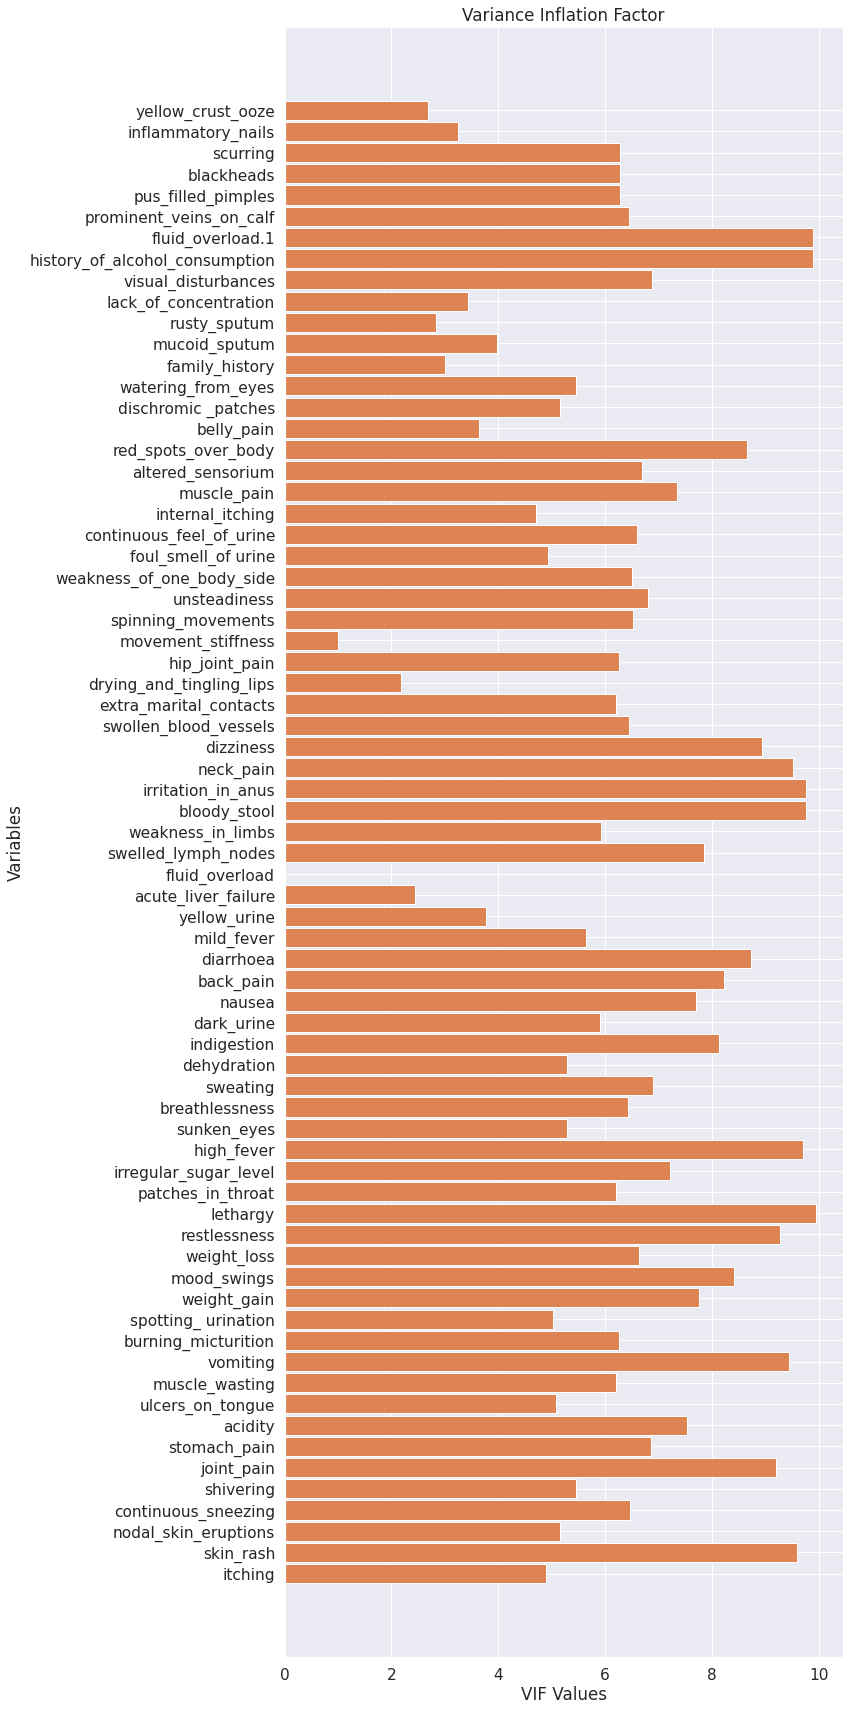

In [ ]:
import matplotlib.pyplot as plt

# Calculate VIF values
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a stacked bar graph of the VIF values
plt.barh(X.columns, vif_values, height=0.9)
plt.barh(X.columns, vif_values, height=0.9, left=[0]*len(X.columns))

# Add labels to the x-axis and y-axis
plt.xlabel('VIF Values')
plt.ylabel('Variables')

# Add a title
plt.title('Variance Inflation Factor')

# Display the graph
plt.show()


In [ ]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,...,lack_of_concentration,visual_disturbances,history_of_alcohol_consumption,fluid_overload.1,prominent_veins_on_calf,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state = 1)

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# create an instance of SelectKBest with f_classif as the score function and k value
selector = SelectKBest(score_func=f_classif, k=40)

# fit the selector to the training data and transform the data to select the top k features
X_train_selected = selector.fit_transform(X_train_scaled, Y_train)
X_test_selected = selector.transform(X_test_scaled)
# X_train_selected.columns

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [33] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:

# Get the mask of selected features
mask = selector.get_support()

# Print the selected feature names
selected_features = X_train.columns[mask]
print("Selected features:", len(selected_features))

Selected features: 40


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')

# fit the classifier to the selected training data
knn.fit(X_train_selected, Y_train)

# evaluate the classifier on the selected test data
knn_accuracy = knn.score(X_test_selected, Y_test)
print(knn_accuracy)



0.8882113821138211


In [ ]:
Y_pred = knn.predict(X_test_selected)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

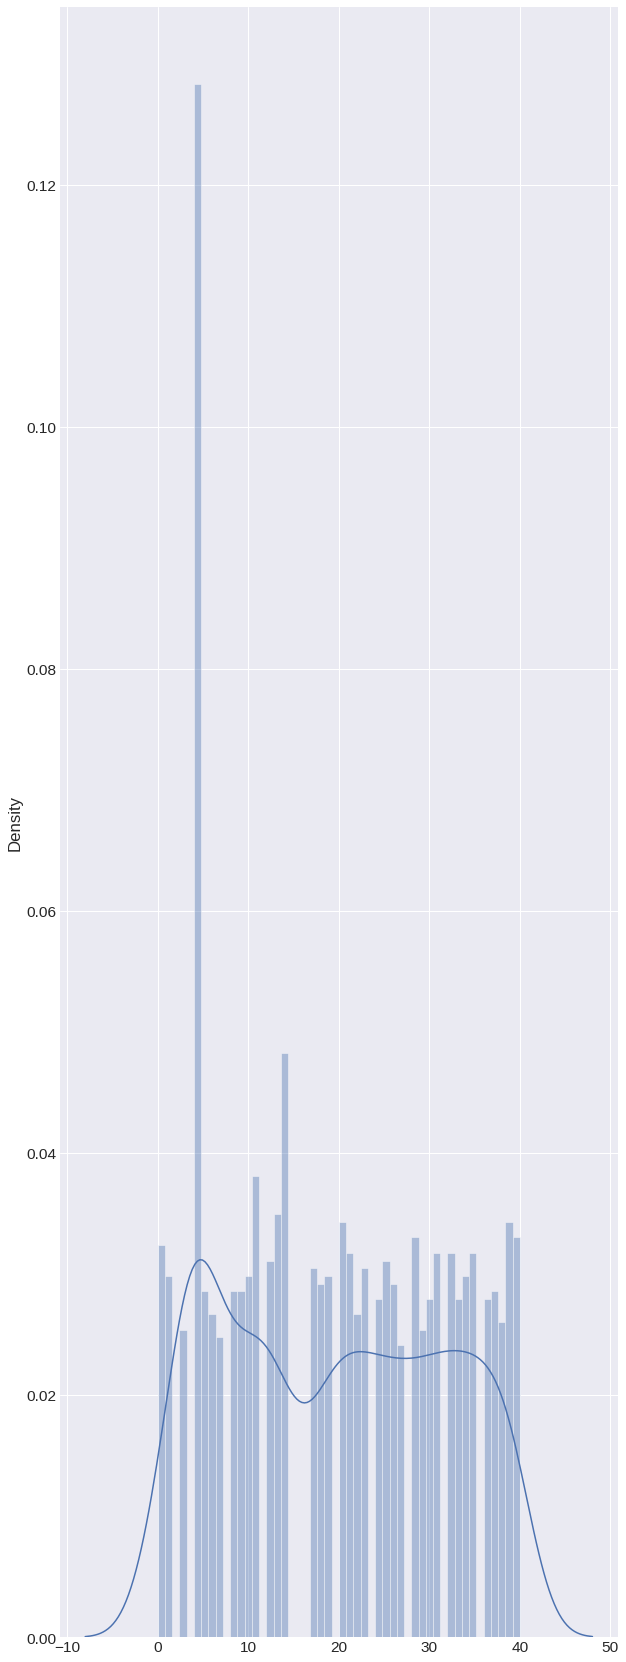

In [146]:
import seaborn as sns
sns.distplot((Y_pred),bins=50)               #Using seaborn alongwith matplotlib to display overall distribution plot

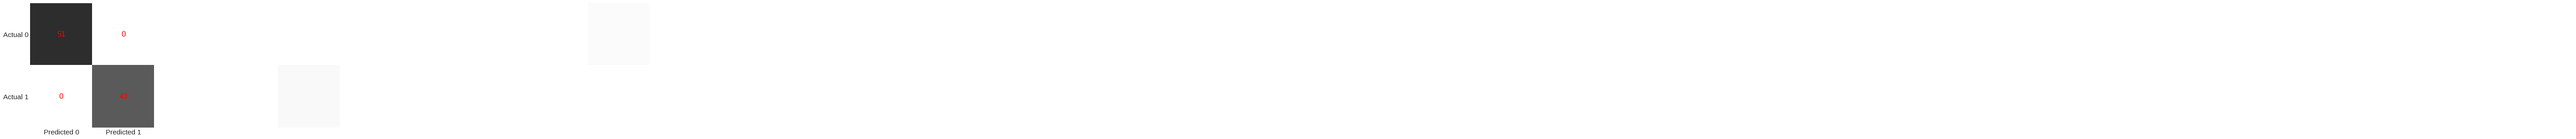

In [158]:
confusionMatrix = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(100,100))
ax.imshow(confusionMatrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusionMatrix[i, j], ha='center', va='center', color='red')
plt.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_selected, Y_train)

# evaluate the model on the test data
log_accuracy = clf.score(X_test_selected, Y_test)
print(log_accuracy)

0.8963414634146342


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


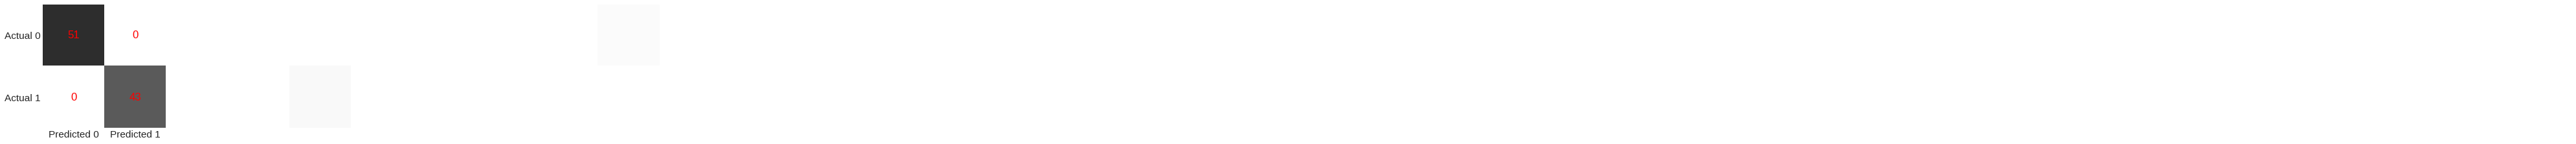

In [173]:
from sklearn.linear_model import LogisticRegression

confusionMatrix = confusion_matrix(Y_test, clf.predict(X_test_selected))

fig, ax = plt.subplots(figsize=(70, 70))
ax.imshow(confusionMatrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusionMatrix[i, j], ha='center', va='center', color='red')
plt.show()

#SVC

In [155]:
from sklearn.svm import SVC

# create an SVC classifier
svcl = SVC(kernel='linear', probability = True)

# fit the classifier to the selected training data
svcl.fit(X_train_selected, Y_train)

# evaluate the classifier on the selected test data
svc_accuracyl = svcl.score(X_test_selected, Y_test)
print('For Linear Kernel - ',svc_accuracyl)

# create an SVC classifier
svcr = SVC(kernel='rbf', probability = True)

# fit the classifier to the selected training data
svcr.fit(X_train_selected, Y_train)

# evaluate the classifier on the selected test data
svc_accuracyr = svcr.score(X_test_selected, Y_test)
print('For RBF Kernel - ',svc_accuracyr)

# create an SVC classifier
svcp = SVC(kernel='poly', probability = True)

# fit the classifier to the selected training data
svcp.fit(X_train_selected, Y_train)

# evaluate the classifier on the selected test data
svc_accuracyp = svcp.score(X_test_selected, Y_test)
print('For Polynomial Kernel - ',svc_accuracyp)

For Linear Kernel -  0.8963414634146342
For RBF Kernel -  0.8887195121951219
For Polynomial Kernel -  0.8353658536585366


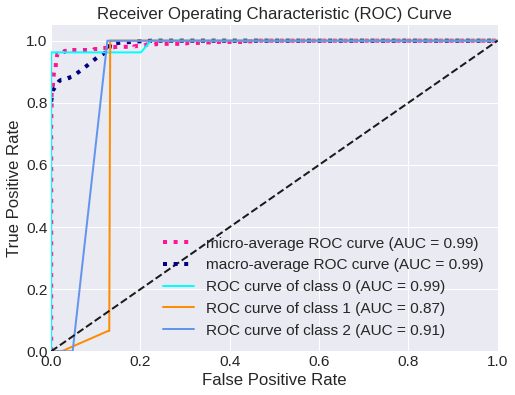

In [156]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# fit the classifier to the selected training data
svc.fit(X_train_selected, Y_train)

# predict class probabilities for the selected test data
Y_prob = svc.predict_proba(X_test_selected)

# binarize the true labels to plot the ROC curves
lb = LabelBinarizer()
lb.fit(Y_test)
Y_test_bin = lb.transform(Y_test)

# compute the AUC score for each class
n_classes = Y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_prob[:, i])
    roc_auc[i] = roc_auc_score(Y_test_bin[:, i], Y_prob[:, i])

# compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_bin.ravel(), Y_prob.ravel())
roc_auc["micro"] = roc_auc_score(Y_test_bin, Y_prob, average="micro")

# compute macro-average ROC curve and AUC score
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = roc_auc_score(Y_test_bin, Y_prob, average="macro")

# plot the ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#Decision Tree

In [ ]:
# Decision Tree classifier using entropy criterion

from sklearn import tree
ent = tree.DecisionTreeClassifier(criterion = 'entropy')
ent = ent.fit(X_train_selected, Y_train)
# Predicting on the test data
y_pred = ent.predict(X_test_selected)
y_pred
result_entropy=pd.DataFrame()
dt_accuracy = accuracy_score(Y_test, y_pred)
#Calculates the accuracy score
from sklearn.metrics import accuracy_score
print(dt_accuracy)

0.8963414634146342


In [ ]:
ent.feature_importances_  

array([0.07027773, 0.04200346, 0.00036909, 0.01313331, 0.0547457 ,
       0.00156197, 0.03384362, 0.00077548, 0.15351474, 0.03877245,
       0.01176963, 0.13876468, 0.0087424 , 0.02810153, 0.01085981,
       0.00126485, 0.03411125, 0.01406218, 0.00460411, 0.05821264,
       0.01432967, 0.00077102, 0.01915537, 0.01240648, 0.02359121,
       0.02196598, 0.02900766, 0.01707319, 0.01571126, 0.00059751,
       0.01151197, 0.0011749 , 0.0116671 , 0.01184312, 0.02104496,
       0.02426595, 0.00200324, 0.0154662 , 0.00971982, 0.01720275])

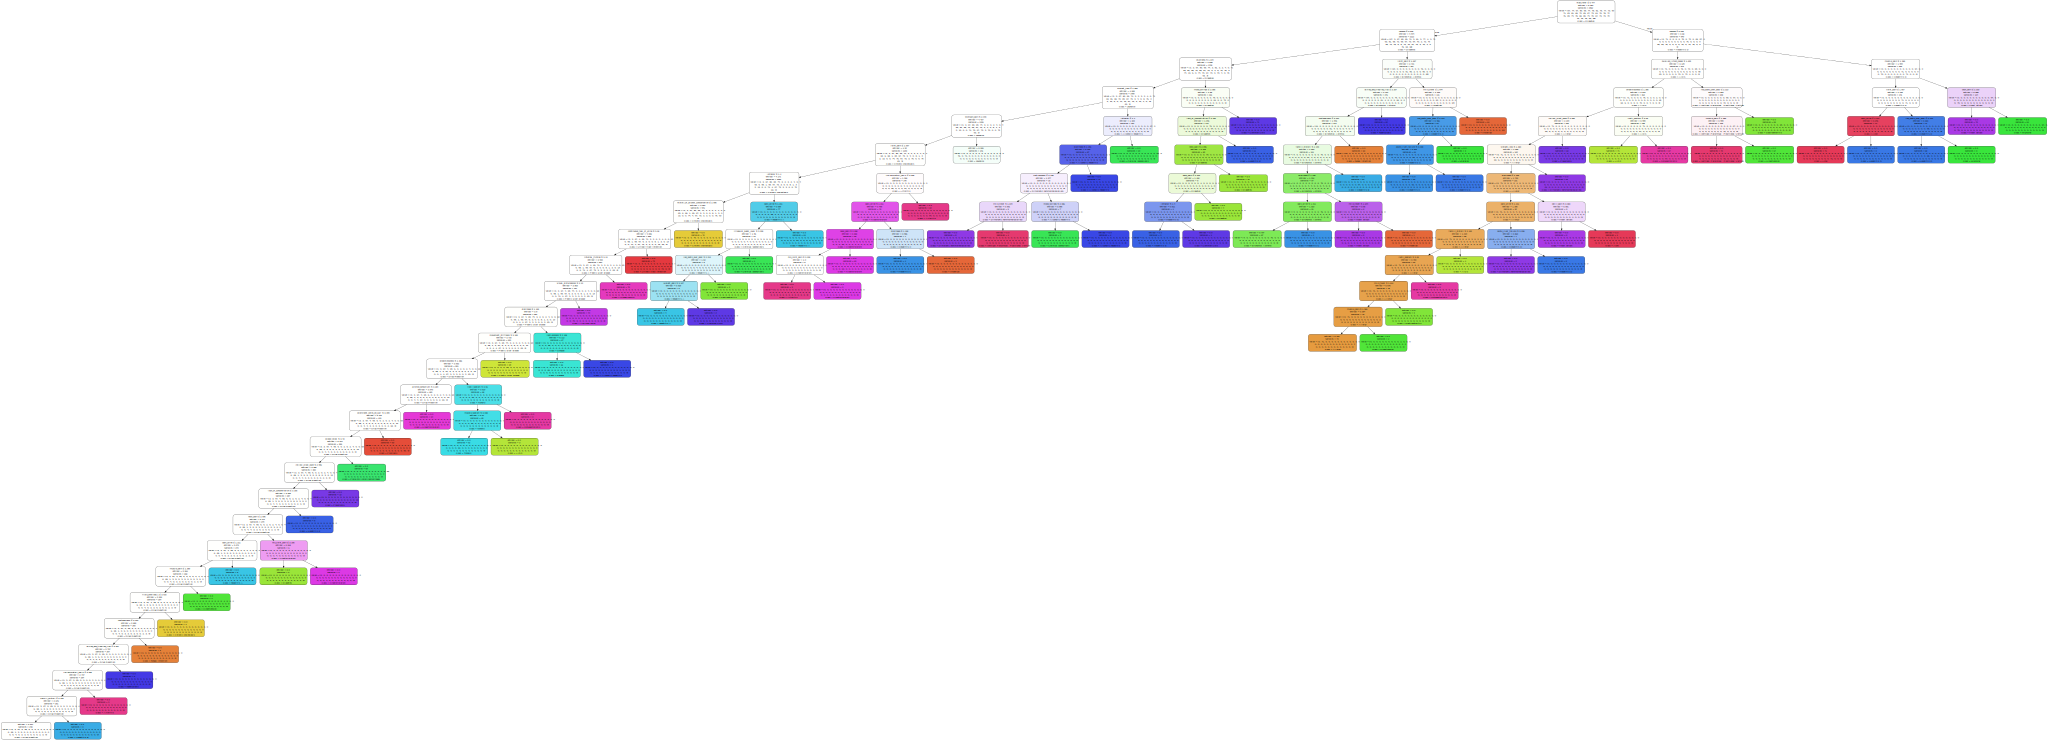

In [ ]:
import graphviz
dot_data = tree.export_graphviz(ent, 
                   feature_names= selected_features,  
                   class_names=['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'],  
                   filled=True, rounded=True,  
                   special_characters=True,
                    out_file=None,
                            )
graph = graphviz.Source(dot_data)
graph.render('DecisionTreeEntDiagram')
graph

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
nb = MultinomialNB()
X_train_shifted = X_train_selected - np.min(X_train_selected) + 1  # Shift all values by 1
X_test_shifted = X_test_selected - np.min(X_test_selected) + 1 
# Train the classifier using the training data
nb.fit(X_train_shifted, Y_train)

# Predict on the test data
y_pred1 = nb.predict(X_test_shifted)

# Print the predicted values
# print(y_pred1)

# Calculate the accuracy score
from sklearn.metrics import accuracy_score
nb_accuracy = accuracy_score(Y_test, y_pred1)
print("Accuracy:", nb_accuracy)

Accuracy: 0.8907520325203252


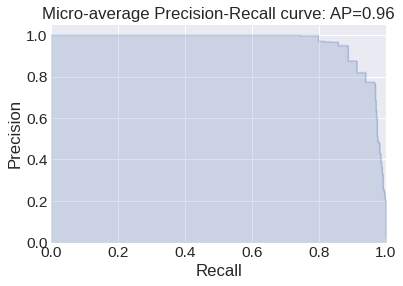

In [149]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Binarize the target variable
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_train))

# Train the classifier using the training data
nb.fit(X_train_shifted, Y_train)

# Predict on the test data
y_score = nb.predict_proba(X_test_shifted)

# Compute precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()
n_classes = Y_test_bin.shape[1]
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test_bin[:, i], y_score[:, i])

# Compute micro-average precision-recall curve and score
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test_bin, y_score, average="micro")

# Plot the micro-average precision-recall curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Micro-average Precision-Recall curve: AP={0:0.2f}'
          .format(average_precision["micro"]))
plt.show()

#Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_selected, Y_train)

# Predict on the test set
Y_pred = rf_model.predict(X_test_selected)
rf_accuracy = accuracy_score(Y_test, Y_pred)
# Evaluate the model
print(rf_accuracy)

0.8963414634146342


#Conclusion

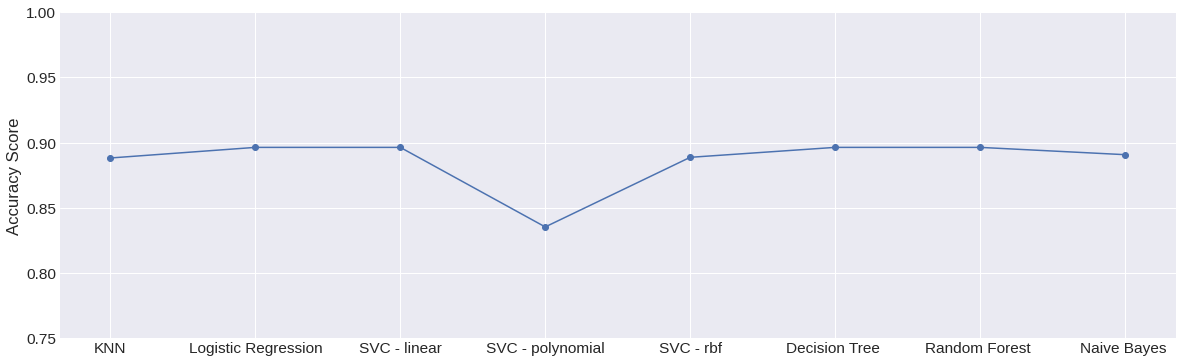

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 6))
models = ['KNN','Logistic Regression', 'SVC - linear', 'SVC - polynomial', 'SVC - rbf', 'Decision Tree ', 
          'Random Forest ', 'Naive Bayes ']
test_accuracy = [knn_accuracy, log_accuracy, svc_accuracyl, svc_accuracyp, svc_accuracyr, dt_accuracy, rf_accuracy, nb_accuracy]
plt.plot(models, test_accuracy, '-o')
plt.ylim(0.75, 1.00)
plt.ylabel("Accuracy Score")
plt.show()